<a href="https://colab.research.google.com/github/aswitha23/EDA/blob/main/multivariate_startup_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error


In [ ]:
startup=pd.read_csv("/content/50_Startups.csv")

In [ ]:
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
startup.shape

(50, 5)

In [ ]:
st=startup.corr()
st

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [ ]:
X=startup.iloc[:,:3]
Y=startup.loc[:,'Profit']

In [ ]:
X

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [ ]:
type(X)
type(Y)

pandas.core.series.Series

In [ ]:
X=X.to_numpy()
Y=Y.to_numpy()

In [ ]:
X.shape

(50, 3)

In [ ]:
Y.shape

(50,)

In [ ]:
Y=Y.reshape(-1,1)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=35,train_size=0.70)

In [ ]:
X_train

array([[   542.05,  51743.15,      0.  ],
       [ 46426.07, 157693.92, 210797.67],
       [153441.51, 101145.55, 407934.54],
       [ 76253.86, 113867.3 , 298664.47],
       [ 44069.95,  51283.14, 197029.42],
       [101913.08, 110594.11, 229160.95],
       [162597.7 , 151377.59, 443898.53],
       [ 28663.76, 127056.21, 201126.82],
       [ 78013.11, 121597.55, 264346.06],
       [134615.46, 147198.87, 127716.82],
       [ 66051.52, 182645.56, 118148.2 ],
       [131876.9 ,  99814.71, 362861.36],
       [130298.13, 145530.06, 323876.68],
       [ 77044.01,  99281.34, 140574.81],
       [ 20229.59,  65947.93, 185265.1 ],
       [ 91992.39, 135495.07, 252664.93],
       [     0.  , 116983.8 ,  45173.06],
       [  1315.46, 115816.21, 297114.46],
       [ 86419.7 , 153514.11,      0.  ],
       [144372.41, 118671.85, 383199.62],
       [ 78389.47, 153773.43, 299737.29],
       [ 93863.75, 127320.38, 249839.44],
       [  1000.23, 124153.04,   1903.93],
       [ 72107.6 , 127864.55, 3531

In [ ]:
X_train.shape

(35, 3)

In [ ]:
reg=linear_model.LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_train_pred=reg.predict(X_train)

In [ ]:
print("MAE=",mean_absolute_error(Y_train,Y_train_pred))
print("MSE=",mean_squared_error(Y_train,Y_train_pred))
print("R2 score=",r2_score(Y_train,Y_train_pred))

MAE= 7196.94765157841
MSE= 93097868.69310454
R2 score= 0.9540828066692922


In [ ]:
Y_test_pred=reg.predict(X_test)

In [ ]:
print("MAE=",mean_absolute_error(Y_test,Y_test_pred))
print("MSE=",mean_squared_error(Y_test,Y_test_pred))
print("R2 score=",r2_score(Y_test,Y_test_pred))

MAE= 5549.578158186449
MSE= 50346468.323551744
R2 score= 0.9062296491307885


ValueError: ignored

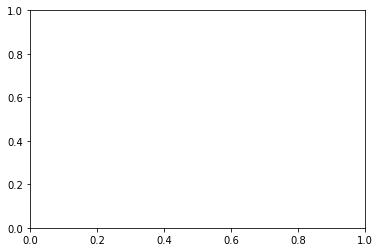